## Training the tensorflow model for predictive LCIA
### Single Layer Neural Nets

In [1]:
import sys
sys.path.append("./src") # append to system path

import create_model as mt
from sklearn import cross_validation
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


#static parameters
BATCH_SIZE = 1
RUGULARIZATION = 0.

/home/runsheng/anaconda2/envs/tensorflow/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Load data
from csv

In [2]:
descs_p = './data/descs/descs_Mar07_166.csv'
target_p = './data/target/CED.csv'
X,y = mt.load_lcia_data(descs_p, target_p)
train_x, test_x, train_y, test_y = cross_validation.train_test_split(
    X, y, test_size=0.2, random_state=1)

### Initilize the Model Object Here
start training

In [3]:
print train_x.shape, train_y.shape

(132, 77) (132, 1)


In [4]:
this_model = mt.single_layer_model('./nets/Mar2_CED/CED_Mar2')

### Data Preprocessing
We have option to do normalization and PCA here (choose one)

Standard scaler:

In [5]:
train_x, test_x, vec = this_model.fit_scaler(StandardScaler(),train_x, test_x)

Or PCA:

In [ ]:
pca = PCA(n_components =2)
pca.fit_transform(train_x)
pca.transform(test_x)

0 -3.5322037074 -2.08702910973
1 -2.18296473761 -1.36179511443
2 -1.25759844376 -0.87762731377
3 -0.649407384172 -0.568617411907
4 -0.264038373588 -0.380023737171
5 -0.0237456894628 -0.268192309207
6 0.128058522378 -0.20099251226
7 0.227904807302 -0.158601210323
8 0.297713414413 -0.12924457916
9 0.349662179306 -0.106639413785
10 0.390318401356 -0.0878436654428
11 0.423567269922 -0.0711360583865
12 0.451635760956 -0.0558623194523
13 0.475837772361 -0.0417739347284
14 0.497045720697 -0.0286480070448
15 0.515875729569 -0.0161424062453
16 0.532743428457 -0.00452658425359
17 0.547998997508 0.00650143141178
18 0.561857137833 0.0168137466831
19 0.574540113514 0.0263858266575
20 0.586166066983 0.0353215922795
21 0.596838179233 0.0435589089253
22 0.606722113229 0.0513102546663
23 0.615886733181 0.0585688337438
24 0.624413031571 0.0652824486804
25 0.63235934303 0.0716351821509
26 0.639791610623 0.077659747388
27 0.646746274376 0.0832626951875
28 0.65328491947 0.0886653028576
29 0.659431356003 0.

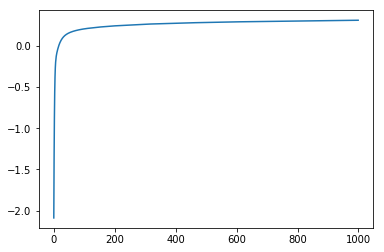

In [6]:
this_model.train(train_x, train_y, test_x, test_y, num_epoch=1000, num_neroun=256, learning_rate=0.01)

### Load Model and Predict
Load the trained model and predict it on the test data, compare it with the Y

In [ ]:
new_model = mt.single_layer_model.load_model('./nets/Mar2_CED/CED_Mar2.json')
this_pred = new_model.predict(test_x)
r2 = r2_score(test_y, this_pred)
print r2